In [ ]:
from fastai.tabular.all import *

# Rossmann

## Data preparation

To create the feature-engineered train_clean and test_clean from the Kaggle competition data, run `rossman_data_clean.ipynb`. One important step that deals with time series is this:

```python
add_datepart(train, "Date", drop=False)
add_datepart(test, "Date", drop=False)
```

In [ ]:
path = Config().data/'rossmann'
train_df = pd.read_pickle(path/'train_clean')

In [ ]:
train_df.head().T

,0,1,2,3,4
Store,1,2,3,4,5
DayOfWeek,5,5,5,5,5
Date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
Sales,5263,6064,8314,13995,4822
Customers,555,625,821,1498,559
...,...,...,...,...,...
StateHoliday_bw,0,0,0,0,0
SchoolHoliday_bw,5,5,5,5,5
Promo_fw,5,1,5,1,1
StateHoliday_fw,0,0,0,0,0


In [ ]:
n = len(train_df); n

844338

### Experimenting with a sample

In [ ]:
idx = np.random.permutation(range(n))[:2000]
idx.sort()
small_df = train_df.iloc[idx]
small_cont_vars = ['CompetitionDistance', 'Mean_Humidity']
small_cat_vars =  ['Store', 'DayOfWeek', 'PromoInterval']
small_df = small_df[small_cat_vars + small_cont_vars + ['Sales']].reset_index(drop=True)

In [ ]:
small_df.head()

,Store,DayOfWeek,PromoInterval,CompetitionDistance,Mean_Humidity,Sales
0,471,5,"Feb,May,Aug,Nov",5300.0,50,9116.0
1,656,5,"Jan,Apr,Jul,Oct",410.0,54,4576.0
2,1112,5,NaN,1880.0,61,9626.0
3,459,4,"Feb,May,Aug,Nov",250.0,86,10847.0
4,1108,4,NaN,540.0,51,7187.0


In [ ]:
small_df.iloc[1000:].head()

,Store,DayOfWeek,PromoInterval,CompetitionDistance,Mean_Humidity,Sales
1000,75,3,NaN,22440.0,68,4823.0
1001,79,3,NaN,3320.0,68,3968.0
1002,390,3,NaN,1600.0,71,9571.0
1003,400,3,"Jan,Apr,Jul,Oct",70.0,73,7629.0
1004,825,3,"Jan,Apr,Jul,Oct",380.0,78,3422.0


In [ ]:
splits = [list(range(1000)),list(range(1000,2000))]
to = TabularPandas(small_df.copy(), Categorify, cat_names=small_cat_vars, cont_names=small_cont_vars, splits=splits)

In [ ]:
to.train.items.head()

,Store,DayOfWeek,PromoInterval,CompetitionDistance,Mean_Humidity,Sales
0,283,5,1,5300.0,50,9116.0
1,389,5,2,410.0,54,4576.0
2,653,5,0,1880.0,61,9626.0
3,272,4,1,250.0,86,10847.0
4,649,4,0,540.0,51,7187.0


In [ ]:
to.valid.items.head()

,Store,DayOfWeek,PromoInterval,CompetitionDistance,Mean_Humidity,Sales
1000,46,3,0,22440.0,68,4823.0
1001,49,3,0,3320.0,68,3968.0
1002,0,3,0,1600.0,71,9571.0
1003,236,3,2,70.0,73,7629.0
1004,492,3,2,380.0,78,3422.0


In [ ]:
to.classes['DayOfWeek']

(#8) [#na#,1,2,3,4,5,6,7]

In [ ]:
splits = [list(range(1000)),list(range(1000,2000))]
to = TabularPandas(small_df.copy(), FillMissing, cat_names=small_cat_vars, cont_names=small_cont_vars, splits=splits)

In [ ]:
to.train.items[to.train.items['CompetitionDistance_na'] == True]

,Store,DayOfWeek,PromoInterval,CompetitionDistance,Mean_Humidity,Sales,CompetitionDistance_na,Mean_Humidity_na
521,291,5,NaN,2380.0,83,7928.0,True,False


### Preparing full data set

In [ ]:
train_df = pd.read_pickle(path/'train_clean')
test_df = pd.read_pickle(path/'test_clean')

In [ ]:
len(train_df),len(test_df)

(844338, 41088)

In [ ]:
procs=[FillMissing, Categorify, Normalize]

In [ ]:
dep_var = 'Sales'
cat_names = ['Store', 'DayOfWeek', 'Year', 'Month', 'Day', 'StateHoliday', 'StoreType', 'Assortment', 
    'PromoInterval', 'CompetitionOpenSinceYear', 'Promo2SinceYear', 'State', 'Week', 'Events', 'Promo_fw', 
    'Promo_bw', 'StateHoliday_fw', 'StateHoliday_bw', 'SchoolHoliday_fw', 'SchoolHoliday_bw']

cont_names = ['CompetitionDistance', 'Max_TemperatureC', 'Mean_TemperatureC', 'Min_TemperatureC', 
    'Max_Humidity', 'Mean_Humidity', 'Min_Humidity', 'Max_Wind_SpeedKm_h', 'Mean_Wind_SpeedKm_h', 
    'CloudCover', 'trend', 'trend_DE', 'AfterStateHoliday', 'BeforeStateHoliday', 'Promo', 'SchoolHoliday']

In [ ]:
dep_var = 'Sales'
df = train_df[cat_names + cont_names + [dep_var,'Date']].copy()

In [ ]:
test_df['Date'].min(), test_df['Date'].max()

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

In [ ]:
cut = train_df['Date'][(train_df['Date'] == train_df['Date'][len(test_df)])].index.max()
cut

41254

In [ ]:
splits = (list(range(cut, len(train_df))),list(range(cut)))

In [ ]:
train_df[dep_var].head()

0     5263.0
1     6064.0
2     8314.0
3    13995.0
4     4822.0
Name: Sales, dtype: float64

In [ ]:
train_df[dep_var] = np.log(train_df[dep_var])
#train_df = train_df.iloc[:100000]

In [ ]:
#cut = 20000

In [ ]:
splits = (list(range(cut, len(train_df))),list(range(cut)))

In [ ]:
%time to = TabularPandas(train_df, procs, cat_names, cont_names, dep_var, y_block=TransformBlock(), splits=splits)

CPU times: user 3min 57s, sys: 59.2 s, total: 4min 56s
Wall time: 44.8 s


In [ ]:
dls = to.dataloaders(bs=512, path=path)

In [ ]:
dls.show_batch()

,Store,DayOfWeek,Year,Month,Day,StateHoliday,StoreType,Assortment,PromoInterval,CompetitionOpenSinceYear,Promo2SinceYear,State,Week,Events,Promo_fw,Promo_bw,StateHoliday_fw,StateHoliday_bw,SchoolHoliday_fw,SchoolHoliday_bw,CompetitionDistance_na,Max_TemperatureC_na,Mean_TemperatureC_na,Min_TemperatureC_na,Max_Humidity_na,Mean_Humidity_na,Min_Humidity_na,Max_Wind_SpeedKm_h_na,Mean_Wind_SpeedKm_h_na,CloudCover_na,trend_na,trend_DE_na,AfterStateHoliday_na,BeforeStateHoliday_na,Promo_na,SchoolHoliday_na,CompetitionDistance,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,CloudCover,trend,trend_DE,AfterStateHoliday,BeforeStateHoliday,Promo,SchoolHoliday,Sales
0,90,6,2013,5,11,False,a,a,#na#,2007,#na#,NW,19,Rain,5,0,0,1,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,329.999926,16.0,11.0,7.000000e+00,93.0,77.0,48.000000,37.0,16.0,6.0,62.000000,60.0,1.999998,-9.000000,1.436922e-08,1.656771e-09,8.963928
1,852,4,2013,3,14,False,c,a,"Jan,Apr,Jul,Oct",2004,2011,HE,11,Snow,3,1,0,0,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,940.000185,2.0,-4.0,-1.100000e+01,93.0,78.0,51.000000,21.0,5.0,4.0,70.000000,62.0,71.999998,-15.000000,1.436922e-08,1.656771e-09,8.379310
2,189,3,2014,9,24,False,d,a,#na#,2014,#na#,RP,39,Rain,2,2,0,0,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,5760.000013,16.0,11.0,6.000000e+00,97.0,77.0,59.000000,11.0,5.0,6.0,63.000000,72.0,96.999998,-9.000000,1.436922e-08,1.656771e-09,8.744328
3,615,2,2014,3,4,False,d,a,#na#,2007,#na#,HE,10,#na#,4,2,0,0,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,729.999814,13.0,7.0,4.409999e-08,100.0,72.0,28.999999,13.0,6.0,3.0,50.000000,55.0,62.000000,-45.000000,1.000000e+00,1.656771e-09,9.527994
4,525,3,2013,2,6,False,d,c,#na#,2013,#na#,BE,6,#na#,3,3,0,0,3,3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1869.999936,4.0,1.0,-3.000000e+00,93.0,73.0,48.000000,24.0,14.0,4.0,55.000000,51.0,36.000000,-51.000000,1.000000e+00,1.000000e+00,9.314791
5,671,2,2013,10,1,False,a,c,"Jan,Apr,Jul,Oct",2008,2010,BY,40,#na#,1,3,1,0,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2070.000112,11.0,9.0,8.000000e+00,93.0,84.0,71.000000,13.0,8.0,7.0,57.000000,62.0,47.000000,-1.999999,1.436922e-08,1.656771e-09,8.411611
6,243,4,2015,3,12,False,a,a,"Feb,May,Aug,Nov",#na#,2013,BY,11,Snow,3,1,0,0,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,310.000001,8.0,4.0,4.409999e-08,87.0,71.0,49.000000,14.0,6.0,6.0,65.000000,74.0,65.000000,-21.999999,1.436922e-08,1.656771e-09,8.549273
7,800,2,2013,9,10,False,d,a,#na#,2014,#na#,RP,37,Rain,4,2,0,0,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2020.000068,17.0,14.0,1.200000e+01,89.0,64.0,41.000000,24.0,14.0,5.0,37.999999,51.0,103.000001,-23.000000,1.000000e+00,1.656771e-09,8.782169
8,253,1,2013,6,10,False,a,c,"Feb,May,Aug,Nov",#na#,2013,NW,24,#na#,0,4,0,0,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,250.000227,19.0,14.0,1.100000e+01,82.0,66.0,39.000000,19.0,13.0,4.0,69.000000,67.0,11.000001,-115.000003,1.436922e-08,1.656771e-09,8.610683
9,1053,3,2014,8,27,False,a,a,#na#,2015,#na#,"HB,NI",35,Fog,2,2,0,0,7,7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1710.000074,21.0,13.0,6.000000e+00,100.0,80.0,37.000000,14.0,5.0,3.0,75.000000,77.0,79.000001,-37.000000,1.436922e-08,1.000000e+00,8.795733


## Model

In [ ]:
max_log_y = np.log(1.2) + np.max(train_df['Sales'])
y_range = (0, max_log_y)

In [ ]:
dls.c = 1

In [ ]:
learn = tabular_learner(dls, layers=[1000,500], loss_func=MSELossFlat(),
                        config=tabular_config(ps=[0.001,0.01], embed_p=0.04, y_range=y_range), 
                        metrics=exp_rmspe)

In [ ]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(1116, 81)
    (1): Embedding(8, 5)
    (2): Embedding(4, 3)
    (3): Embedding(13, 7)
    (4): Embedding(32, 11)
    (5): Embedding(3, 3)
    (6): Embedding(5, 4)
    (7): Embedding(4, 3)
    (8): Embedding(4, 3)
    (9): Embedding(24, 9)
    (10): Embedding(8, 5)
    (11): Embedding(13, 7)
    (12): Embedding(53, 15)
    (13): Embedding(22, 9)
    (14): Embedding(7, 5)
    (15): Embedding(7, 5)
    (16): Embedding(4, 3)
    (17): Embedding(4, 3)
    (18): Embedding(9, 5)
    (19): Embedding(9, 5)
    (20): Embedding(3, 3)
    (21): Embedding(2, 2)
    (22): Embedding(2, 2)
    (23): Embedding(2, 2)
    (24): Embedding(2, 2)
    (25): Embedding(2, 2)
    (26): Embedding(2, 2)
    (27): Embedding(2, 2)
    (28): Embedding(2, 2)
    (29): Embedding(3, 3)
    (30): Embedding(2, 2)
    (31): Embedding(2, 2)
    (32): Embedding(2, 2)
    (33): Embedding(2, 2)
    (34): Embedding(2, 2)
    (35): Embedding(2, 2)
  )
  (emb_drop): Dropou

In [ ]:
len(dls.train_ds.cont_names)

16

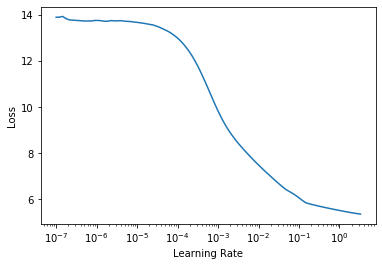

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(5, 3e-3, wd=0.2)

epoch,train_loss,valid_loss,_exp_rmspe,time
0,0.027484,0.028010,0.159123,01:16
1,0.015487,0.018240,0.141216,01:16
2,0.011581,0.015734,0.123025,01:16
3,0.008431,0.012607,0.112609,01:16
4,0.007278,0.011724,0.108596,01:16


(10th place in the competition was 0.108)

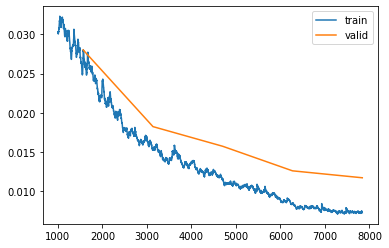

In [ ]:
learn.recorder.plot_loss(skip_start=1000)

(10th place in the competition was 0.108)

## Inference on the test set

In [ ]:
test_to = to.new(test_df)
test_to.process()

In [ ]:
test_dls = test_to.dataloaders(bs=512, path=path, shuffle_train=False)

In [ ]:
learn.metrics=[]

In [ ]:
tst_preds,_ = learn.get_preds(dl=test_dls.train)

In [ ]:
np.exp(tst_preds.numpy()).T.shape

(1, 41088)

In [ ]:
test_df["Sales"]=np.exp(tst_preds.numpy()).T[0]

In [ ]:
test_df[["Id","Sales"]] = test_df[["Id","Sales"]].astype("int")
test_df[["Id","Sales"]].to_csv("rossmann_submission.csv",index=False)

This submission scored 3rd on the private leaderboard.